In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood['Type'] = 'Wood'
steel['Type'] = 'Steel'
full = pd.concat([wood, steel]).reset_index()
coasters = pd.read_csv('roller_coasters.csv')

names_replace = [
    ('Grizzly \(KD\)', 'Grizzly'),
    ('Intimidator-305', 'Intimidator 305'),
    ('Superman: The Ride', 'Superman The Ride'),
    ('^The ', '')]
parks_replace = [
    ('Conneaut Lake Park', 'Conneaut Lake'),
    ('Luna Park/Coney Island', 'Luna Park'),
    ('Califoria’s Great America', 'California’s Great America'),
    ('Mt. Olympus Theme Park', 'Mount Olympus'),
    ('Oakwood Leisure Park', 'Oakwood'),
    ('PNE Playland', 'Playland'),
    ('ZDTs', "ZDT’s"),
    ('Fun Spot America', 'Fun Spot')]

for i in names_replace:
    full['Name'] = full['Name'].str.replace(i[0], i[1])
for i in parks_replace:
    full['Park'] = full['Park'].str.replace(i[0], i[1])

full.loc[125, 'Supplier'] = 'Summers-KECO'
coasters.loc[683, 'height'] = 9.2
coasters.loc[730, 'height'] = 9.2
coasters.loc[2166, 'height'] = 23

coasters.num_inversions = coasters.num_inversions.astype(pd.Int64Dtype())

In [3]:
sns.set()

In [4]:
def rank_dynamics(base, name, park):
    ax = plt.subplot()
    coaster = base[(base['Name'] == name)&(base['Park'] == park)].reset_index()
    coaster.sort_values('Year of Rank', inplace=True)
    year = coaster['Year of Rank']
    rank = coaster['Rank']
    plt.plot(year, rank, marker='o')
    ax.invert_yaxis()
    ax.set_xticks(coaster['Year of Rank'])
    ax.set_yticks(coaster['Rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{name}: Rank dynamics')
    plt.show()

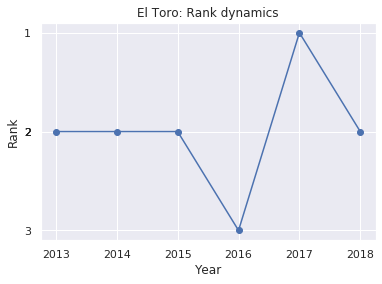

In [5]:
rank_dynamics(full, 'El Toro', 'Six Flags Great Adventure')

In [6]:
def rank_dynamics_pair(base, names):
    ax = plt.subplot()
    years = set()
    ranks = set()
    for name, park in names:
        coaster = base[(base['Name'] == name)&(base['Park'] == park)].reset_index()
        coaster.sort_values('Year of Rank', inplace=True)
        year = coaster['Year of Rank']
        years.update(year)
        rank = coaster['Rank']
        ranks.update(rank)
        plt.plot(year, rank, marker='o', label=name)
    ax.invert_yaxis()
    ax.set_xticks(sorted(years))
    ax.set_yticks(sorted(ranks))
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank dynamics')
    plt.show()

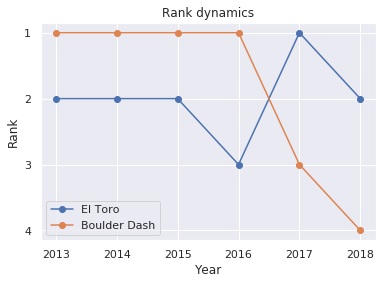

In [7]:
rank_dynamics_pair(full, [('El Toro', 'Six Flags Great Adventure'),
                          ('Boulder Dash', 'Lake Compounce')])

In [8]:
def rank_dynamics_top(base, n, coaster_type):
    ax = plt.subplot()
    years = set()
    coasters = base[(base['Type'] == coaster_type)&(base['Rank'] <= n)].reset_index()
    coasters['Name_Park'] = coasters['Name'] + ' - ' + coasters['Park']
    for name_park in sorted(set(coasters['Name_Park'])):
        coaster = coasters[coasters['Name_Park'] == name_park].reset_index(drop=True)
        coaster.sort_values('Year of Rank', inplace=True)
        year = coaster['Year of Rank']
        years.update(year)
        rank = coaster['Rank']
        plt.plot(year, rank, marker='o', label=name_park)
    ax.invert_yaxis()
    ax.set_xticks(sorted(years))
    ax.set_yticks(range(1, n+1))
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{coaster_type}: Rank dynamics')
    plt.show()

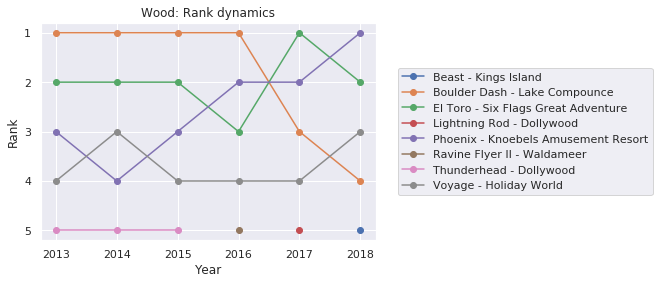

In [9]:
rank_dynamics_top(full, 5, 'Wood')

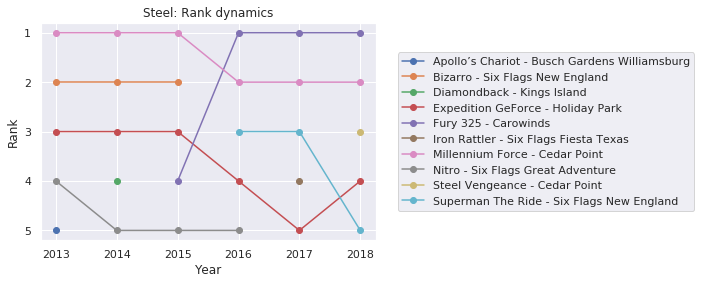

In [10]:
rank_dynamics_top(full, 5, 'Steel')

In [11]:
def histogram(base, ax, column, title, bar=False):
    data = base[column].dropna()
    if bar == True:
        x = range(max(data)+1)
        y = [data.tolist().count(i) for i in x]
        ax.bar(x, y, width=1)
        ax.set_xticks(x)
    else:
        ax.hist(data)
    ax.set_xlabel(title)
    ax.set_ylabel('Count')
    ax.set_title(f'{title} distribution')

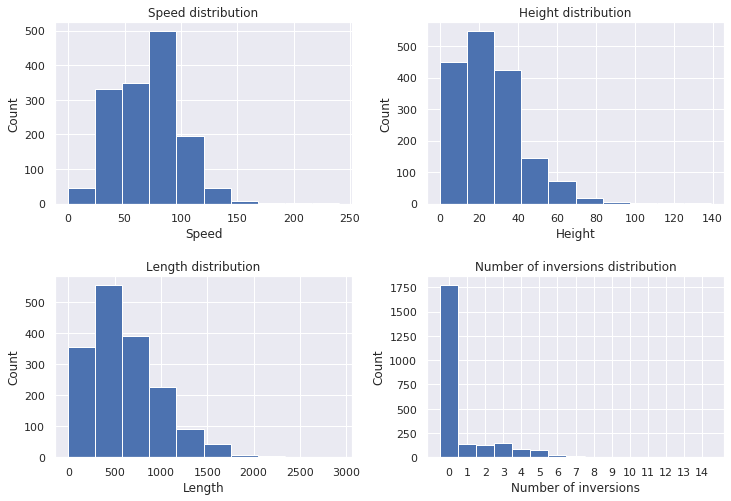

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.4)
histogram(coasters, axs[0, 0], 'speed', 'Speed')
histogram(coasters, axs[0, 1], 'height', 'Height')
histogram(coasters, axs[1, 0], 'length', 'Length')
histogram(coasters, axs[1, 1], 'num_inversions', 'Number of inversions', bar=True)
plt.show()

In [13]:
def park_inversions(base, ax, park):
    data = base[base['park'] == park]
    data = data.dropna(subset=['name', 'num_inversions'])
    data.sort_values(['num_inversions', 'name'], inplace=True, ascending=[False, True])
    sns.barplot(data=data, y='name', x='num_inversions',
                orient='h', palette='deep', ax=ax)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data['name'])
    ax.set_xticks(range(max(data['num_inversions'])+1))
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylabel('')
    ax.set_xlabel('Number of inversions')
    ax.set_title(f'{park}')

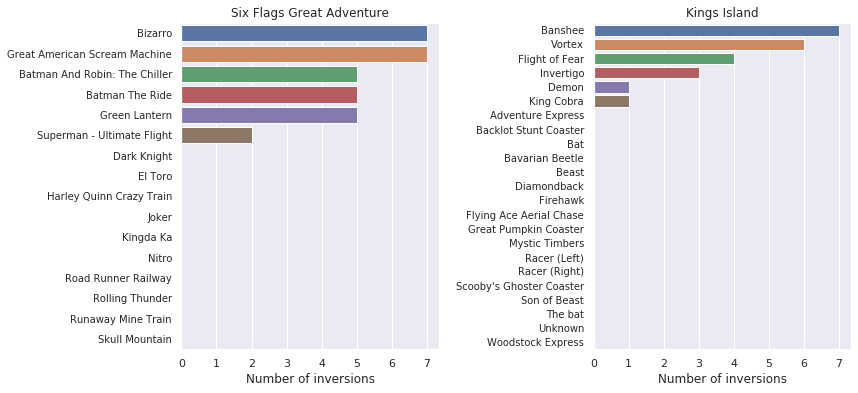

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.6)
park_inversions(coasters, axs[0], 'Six Flags Great Adventure')
park_inversions(coasters, axs[1], 'Kings Island')
plt.show()

In [15]:
def status_pie(base):
    plt.figure(figsize=(8, 4))
    status = base.status.value_counts()
    data = [status['status.operating'], status['status.closed.definitely']]
    plt.pie(data, colors=['g', 'r'], autopct='%d')
    plt.axis('equal')
    plt.legend(['operating', 'closed definitely'])
    plt.title('Parks status')
    plt.show()

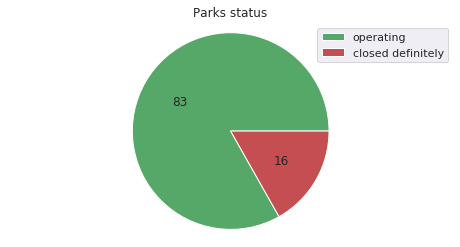

In [16]:
status_pie(coasters)

In [17]:
def scatter(base, ax, column_1, column_2, title_1, title_2):
    ax.scatter(base[column_1], base[column_2], alpha=0.33)
    ax.set_xlabel(f'{title_1}')
    ax.set_ylabel(f'{title_2}')
    ax.set_title(f'{title_1} vs {title_2}')

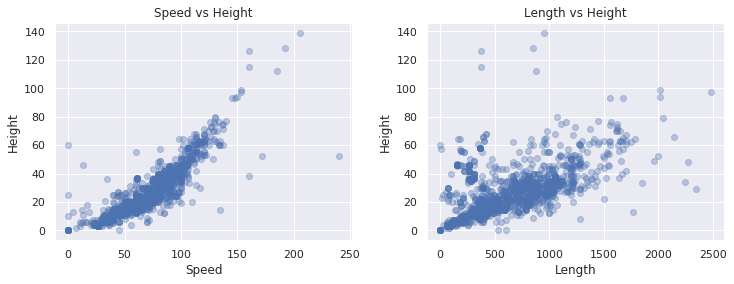

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)
scatter(coasters, axs[0], 'speed', 'height', 'Speed', 'Height')
scatter(coasters, axs[1], 'length', 'height', 'Length', 'Height')
plt.show()

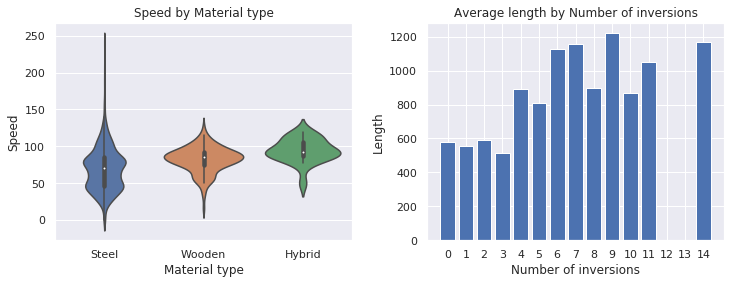

In [19]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.25, hspace=0.4)

plt.subplot(1, 2, 1)
sns.violinplot(data=coasters[coasters['material_type'] != 'na'],
               x='material_type', y='speed')
plt.xlabel('Material type')
plt.ylabel('Speed')
plt.title('Speed by Material type')

ax = plt.subplot(1, 2, 2)
lengths = coasters.groupby('num_inversions').length.mean()
x = range(max(lengths.index+1))
y = [lengths.get(i, 0) for i in x]
plt.bar(x, y)
ax.set_xticks(x)
plt.xlabel('Number of inversions')
plt.ylabel('Length')
plt.title('Average length by Number of inversions')

plt.show()